## Water Potability Prediction
### Authers: Mariam Alaa, Mohammed Safa

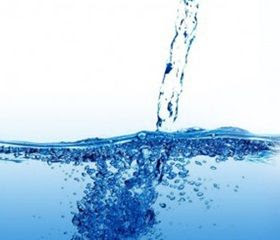

# Introduction 
- Water is essential for life, but some water is not suitable for drinking, water quality can be affected by many factors, such as pollution, contamination, and so on. So, it's important to test the water quality before using it for drinking or other purposes.
- In this project, we will use machine learning techniques to build a predictive model that can classify water samples as potable or not based on some numeric features, We will use dataset called "water_potability" that contains water quality metrics for 3276 different water bodies. We will perform exploratory data analysis, data preprocessing, and modeling using different algorithms. We will also evaluate and compare the performance of our models and make predictions on test data.

# Description
- pH value: pH tells us if water is sour or bitter.WHO has recommended maximum permissible limit of pH from 6.5 to 8.5.
- Hardness: Hardness is how much calcium and magnesium are in water. They come from rocks that water touches. The longer water touches rocks, the harder it is. Hard water makes soap less foamy.
- Solids (Total dissolved solids - TDS): Water can dissolve many things like potassium, calcium, sodium, etc. These things make water taste bad and look different. This is important for using water. The more things water dissolves, the more TDS it has. Good water has TDS less than 500 mg/l. Bad water has TDS more than 1000 mg/l
- Chloramines: Chlorine and chloramine are chemicals that make water clean. Chloramine is made by adding ammonia to chlorine. Water can have some chlorine and chloramine and still be safe to drink.
- Sulfate: Sulfates are things that come from minerals, soil, and rocks. They are in the air, water, plants, and food. People use sulfates for making chemicals. Sea water has a lot of sulfates. Fresh water has less sulfates, but some places have more than others.
- Conductivity: Pure water does not let electricity pass through it. It blocks electricity. More things dissolved in water make it let more electricity pass through it. Electrical conductivity (EC) is a number that tells us how much electricity water can pass through it.
- Organic Carbon: Total Organic Carbon (TOC) is how much carbon is in water from living things. It tells us how much and how good the living things are in the water. The US EPA says that clean water should have TOC less than 2 mg/L and water that needs to be cleaned should have TOC less than 4 mg/L.
- Trihalomethanes: THMs are chemicals that come from water with chlorine. THMs in water change with how much living things, chlorine, and heat are in the water. Water can have some THMs and still be safe to drink.
- Turbidity: Turbidity is how cloudy water is. Cloudy water has more solid things in it. Cloudy water makes light bend and bounce more than clear water. Cloudy water can have more germs that can make us sick. Sick people can have stomach ache, diarrhea, or headache.
- Potability: Potability indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

#  Data Exploration

## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import RobustScaler
import warnings
from sklearn.exceptions import UndefinedMetricWarning



## Data Overview

In [3]:
df = pd.read_csv("water_potability.csv", header = 0)
    # header = 0 indicates that there is a header row "Index 0" - 1st row
display(df.head(10))
df.shape

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0        NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2   8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8        NaN  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0  
8       12.706049        53.928846   3.595017           0  
9       17.927806        71.976601   4.370562           0

(3276, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


## Data Summary 
In this cell, we will print the summary statistics of the dataframe. This will help us to see the mean, standard deviation, minimum, maximum, and quartiles of each feature

In [4]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

## Data Quality
In this cell, we will check the quality of the data by counting the number of missing values in each feature. This will help us to decide how to handle the missing values in the data preprocessing step.

In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

## Feature Distribution
The feature distribution is a histogram of the values for each feature. The following plot shows that most features have a normal distribution, with some skewed.

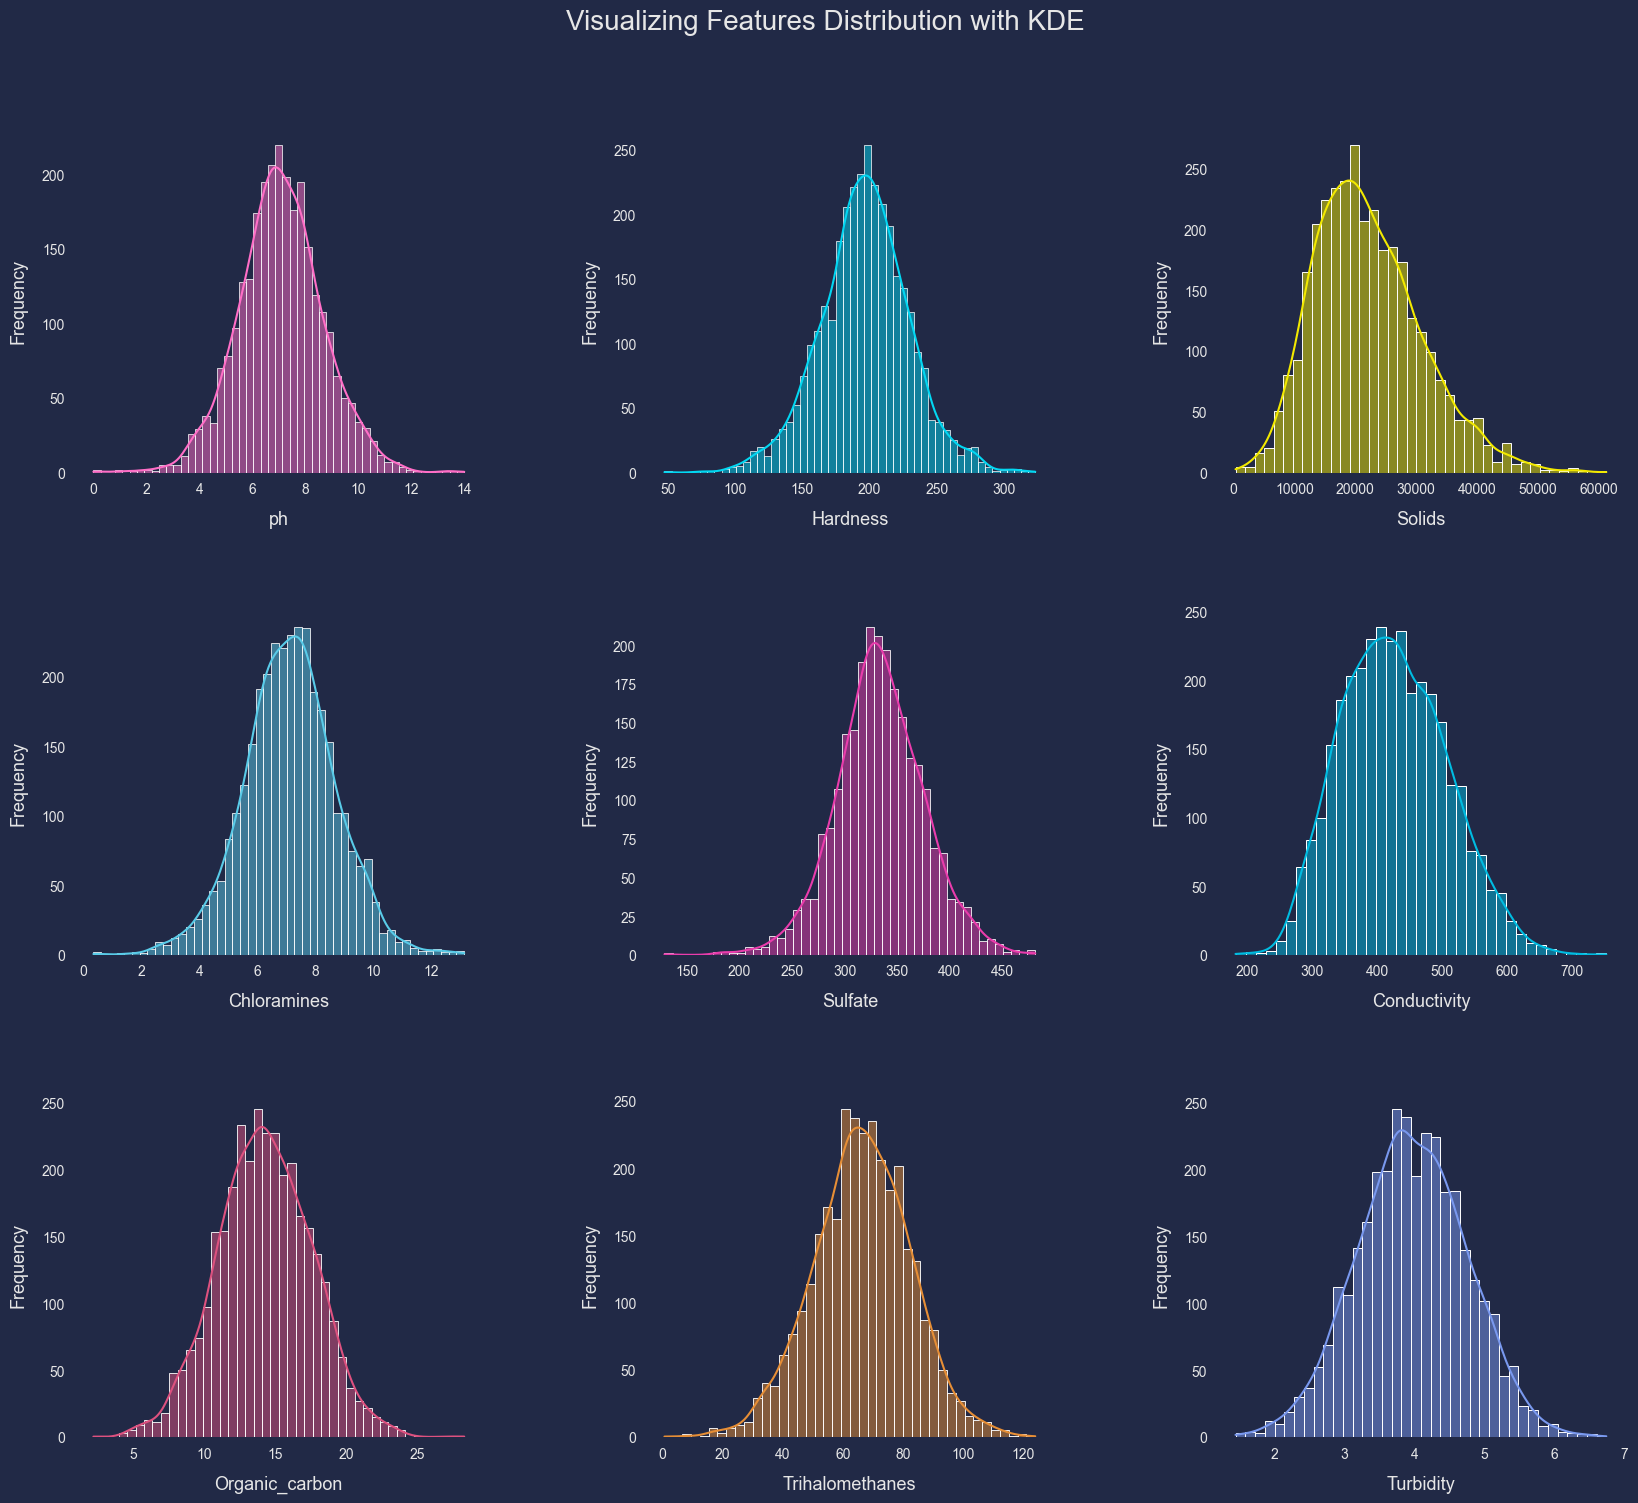

In [6]:
sns.set_style("dark")

# Customize colors
plt.rcParams['axes.facecolor'] = '#212946'  # bluish dark grey
plt.rcParams['figure.facecolor'] = '#212946'  # bluish dark grey
plt.rcParams['text.color'] = '0.9'  # very light grey
plt.rcParams['axes.labelcolor'] = '0.9'  # very light grey
plt.rcParams['xtick.color'] = '0.9'  # very light grey
plt.rcParams['ytick.color'] = '0.9'  # very light grey
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,17))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
# Use Seaborn's dark style


sns.histplot(data=df, x="ph", kde=True, ax=ax[0,0], color='#FF6EC7')
ax[0,0].set_xlabel("ph", labelpad =10, fontsize=13)
ax[0,0].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=df, x="Hardness", kde=True, ax=ax[0,1], color='#02d7f2')
ax[0,1].set_xlabel("Hardness", labelpad =10, fontsize=13)
ax[0,1].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=df, x="Solids", kde=True, ax=ax[0,2], color='#f2e900')
ax[0,2].set_xlabel("Solids", labelpad =10, fontsize=13)
ax[0,2].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=df, x="Chloramines", kde=True, ax=ax[1,0], color='#59CBE8')
ax[1,0].set_xlabel("Chloramines", labelpad =10, fontsize=13)
ax[1,0].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=df, x="Sulfate", kde=True, ax=ax[1,1], color='#E93CAC')
ax[1,1].set_xlabel("Sulfate", labelpad =10, fontsize=13)
ax[1,1].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=df, x="Conductivity", kde=True, ax=ax[1,2], color='#00BCE1')
ax[1,2].set_xlabel("Conductivity", labelpad =10, fontsize=13)
ax[1,2].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=df, x="Organic_carbon", kde=True, ax=ax[2,0], color='#DD517F')
ax[2,0].set_xlabel("Organic_carbon", labelpad =10, fontsize=13)
ax[2,0].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=df, x="Trihalomethanes", kde=True, ax=ax[2,1], color='#E68E36')
ax[2,1].set_xlabel("Trihalomethanes", labelpad =10, fontsize=13)
ax[2,1].set_ylabel("Frequency", labelpad =10, fontsize=13)

sns.histplot(data=df, x="Turbidity", kde=True, ax=ax[2,2], color='#7998EE')
ax[2,2].set_xlabel("Turbidity", labelpad =10, fontsize=13)
ax[2,2].set_ylabel("Frequency", labelpad =10, fontsize=13)

fig.suptitle("Visualizing Features Distribution with KDE", fontsize=20,y=0.95)

sns.despine(left=True, bottom=True)
plt.show()

## Feature Variability and Outliers
In this cell, we will visualize the variability and outliers of each feature using box plots. This will help us to see the median, interquartile range, and extreme values of each feature.

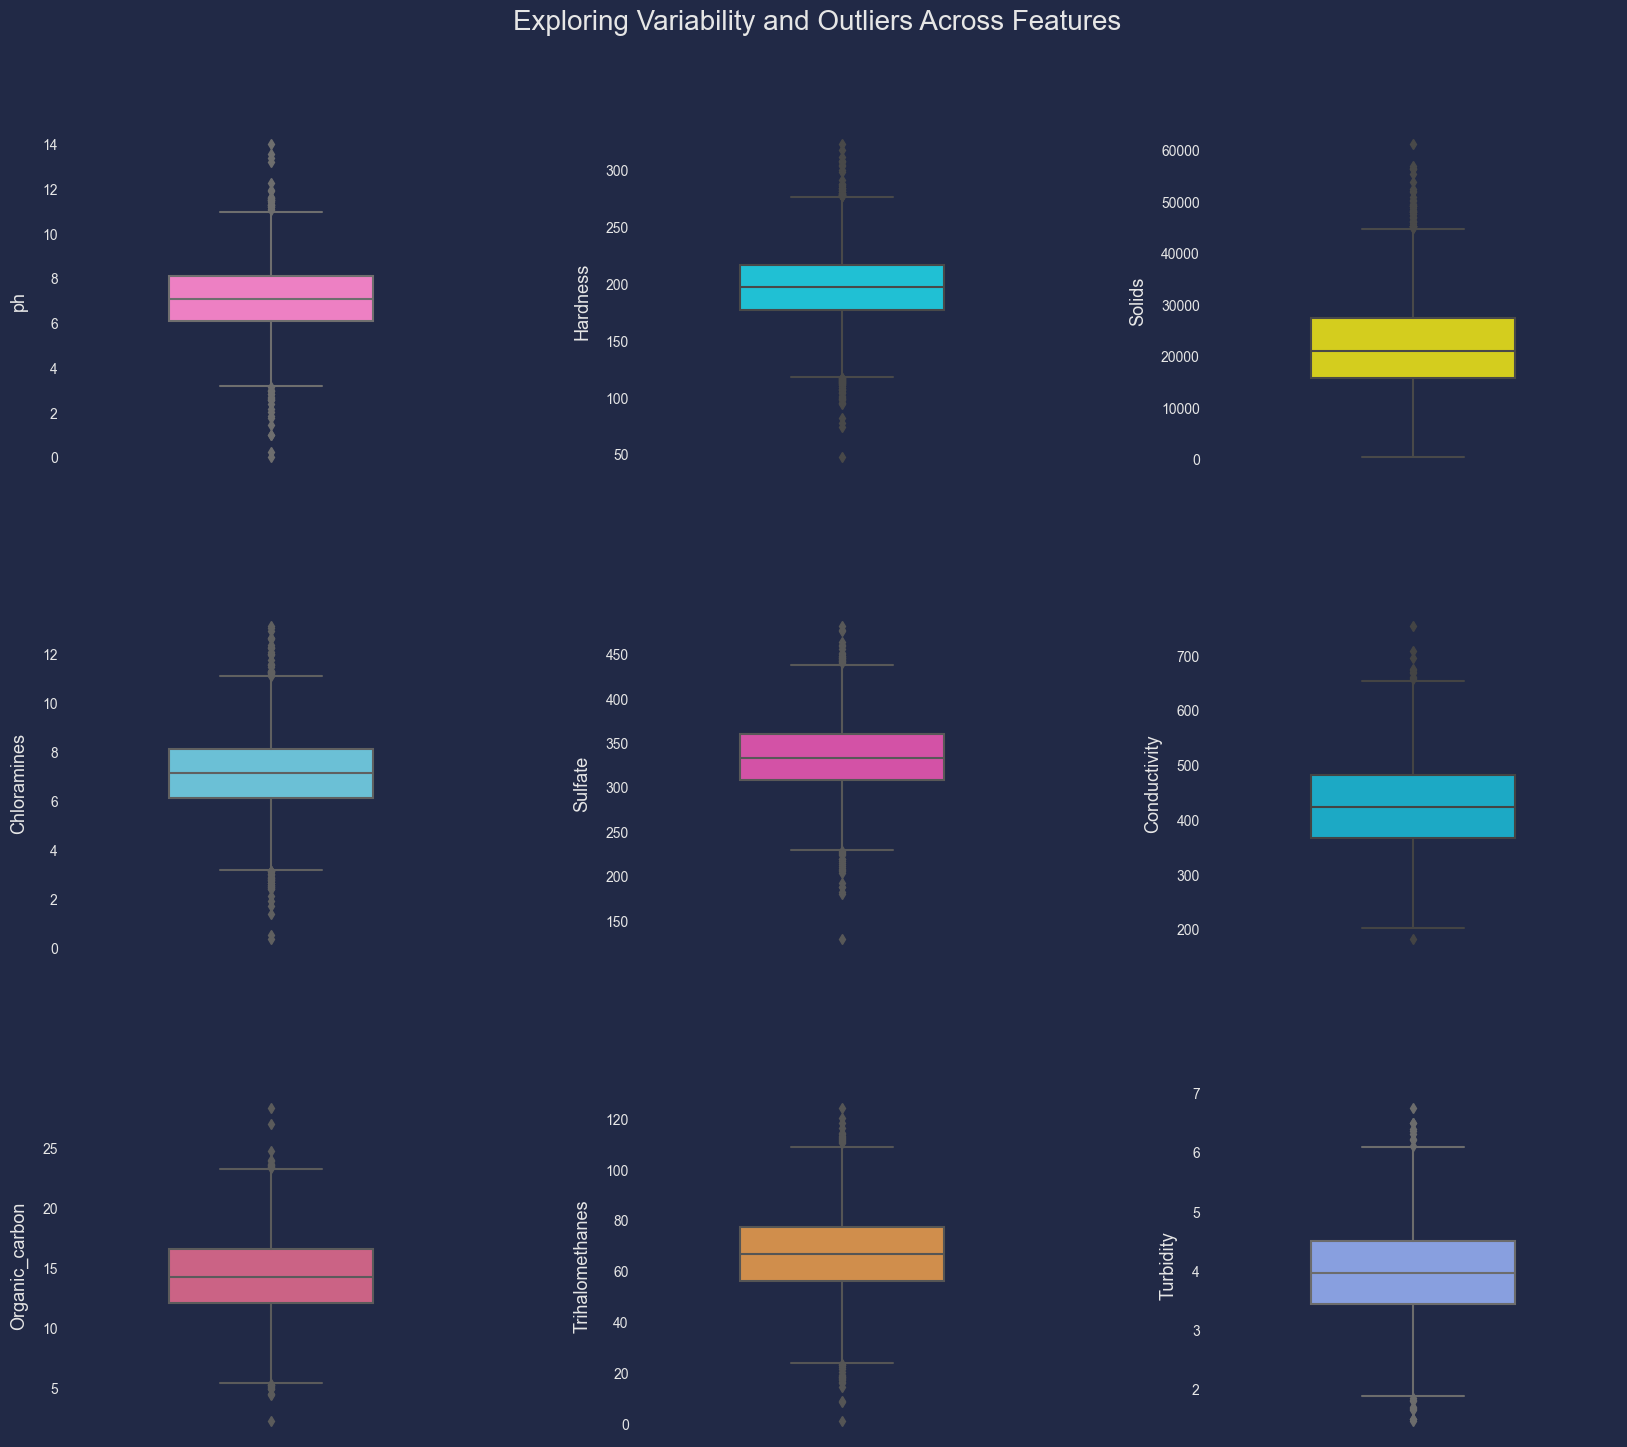

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,17))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

sns.boxplot(data=df, y='ph',ax=ax[0,0], width=0.5, color='#FF6EC7')
ax[0,0].set_ylabel("ph", labelpad =10, fontsize=13)

sns.boxplot(data=df, y='Hardness',ax=ax[0,1], width=0.5, color='#02d7f2')
ax[0,1].set_ylabel("Hardness", labelpad =10, fontsize=13)

sns.boxplot(data=df, y='Solids',ax=ax[0,2], width=0.5, color='#f2e900')
ax[0,2].set_ylabel("Solids", labelpad =10, fontsize=13)

sns.boxplot(data=df, y='Chloramines',ax=ax[1,0], width=0.5, color='#59CBE8')
ax[1,0].set_ylabel("Chloramines", labelpad =10, fontsize=13)

sns.boxplot(data=df, y='Sulfate',ax=ax[1,1], width=0.5, color='#E93CAC')
ax[1,1].set_ylabel("Sulfate", labelpad =10, fontsize=13)

sns.boxplot(data=df, y='Conductivity',ax=ax[1,2], width=0.5, color='#00BCE1')
ax[1,2].set_ylabel("Conductivity", labelpad =10, fontsize=13)

sns.boxplot(data=df, y='Organic_carbon',ax=ax[2,0], width=0.5, color='#DD517F')
ax[2,0].set_ylabel("Organic_carbon", labelpad =10, fontsize=13)

sns.boxplot(data=df, y='Trihalomethanes',ax=ax[2,1], width=0.5, color='#E68E36')
ax[2,1].set_ylabel("Trihalomethanes", labelpad =10, fontsize=13)

sns.boxplot(data=df, y='Turbidity',ax=ax[2,2], width=0.5, color='#7998EE')
ax[2,2].set_ylabel("Turbidity", labelpad =10, fontsize=13)

fig.suptitle("Exploring Variability and Outliers Across Features", fontsize=20,y=0.95)

sns.despine(left=True, bottom=True)
plt.show()


## Feature Correlation
In this cell, we will visualize the correlation between each pair of features using a heatmap. This will help us to see how each feature is related to another feature.

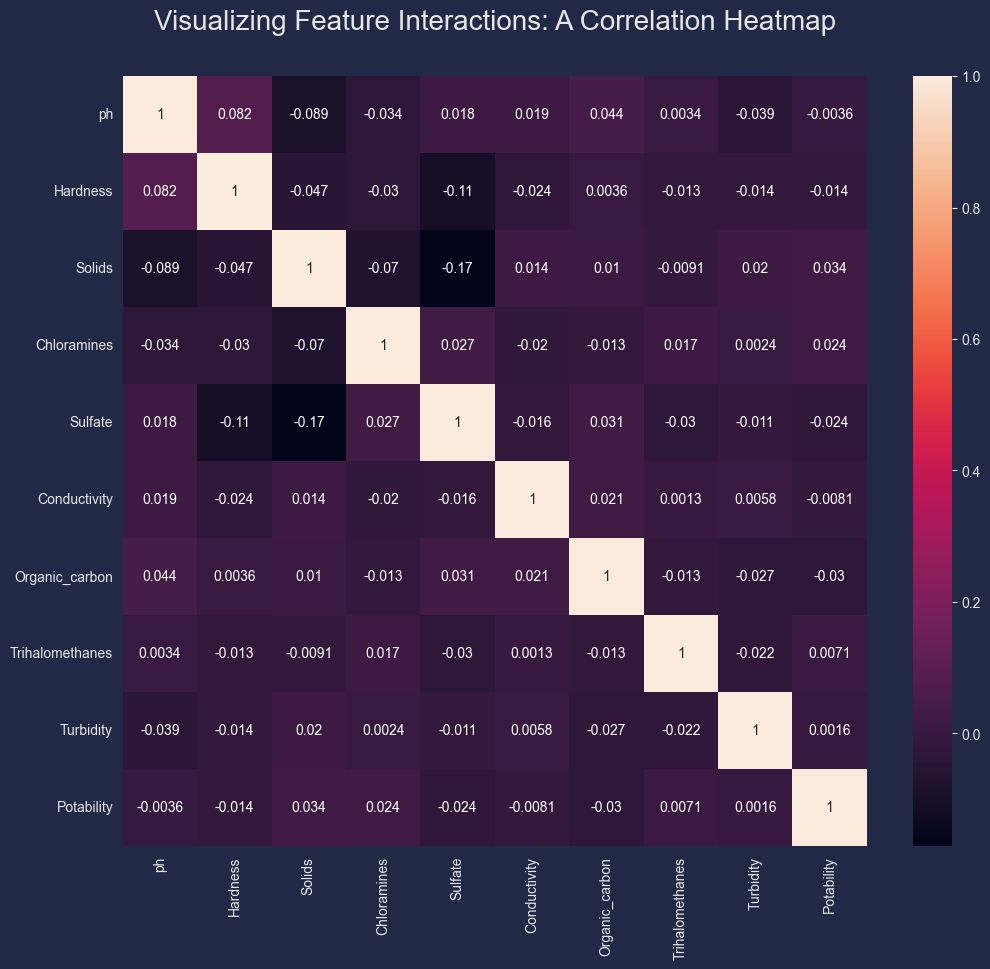

In [8]:
plt.figure(figsize=(12,10))

sns.heatmap(df.corr(),annot=True)
plt.title("Visualizing Feature Interactions: A Correlation Heatmap", fontsize=20,y=1.05)

plt.show()

## Counting Target

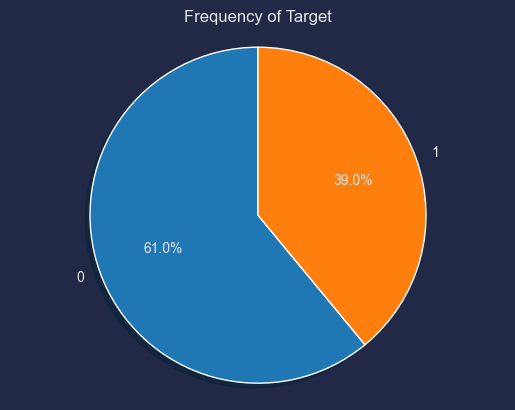

In [9]:
def pie_chart(df: pd.DataFrame, column: str, title: str):
    sns.color_palette() 
    pieData = pd.DataFrame(df[column].value_counts())
    labels = pieData.index.values
    sizes = pieData[column].values
    plt.title(title)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

pie_chart(df,'Potability','Frequency of Target' )

## Data Preprocessing
- Handling Missing Values : we handle the missing values in the data. We will use different methods for different features, such as mean imputation, KNN imputer, MICE imputer, or dropping rows with missing values.
- Handling Outliers: we scale the data using robust scaler to makw data less sensitive for outliers by use median and IQR for scaling
- Feature Selection: we select the most relevant and important features for modeling

## Modeling and Evaluation 
we will apply different machine learning models to the data and evaluate their performance.

In [8]:
def impute_mean_by_group(df:pd.DataFrame, column:str, group:str):
    """Imputes the mean of a group to the missing values in a column."""
    df[column] = df.groupby(group)[column].transform(lambda x: x.fillna(x.mean()))
    return df

In [9]:
def apply_model(df:pd.DataFrame, featurelist:str, target:str, imputer, model):
    """Apply given model with preprocess step to handle missing values then calculate cv_score."""
    df_imputed = df.copy()
    if imputer =='mean_imputer':
        for column in df_imputed.columns:
             if df_imputed[column].isnull().any():  
                 df_imputed = impute_mean_by_group(df_imputed, column, target)
    else:
      if imputer is not None:
        df_imputed[featurelist] = imputer.fit_transform(df[featurelist])
      else:
        df_imputed = df_imputed.dropna()

    X_train, X_test, y_train, y_test = train_test_split(
        df_imputed[featurelist], df_imputed[target], test_size=0.2, random_state=42)

    robust_scaler = RobustScaler()

    X_train = robust_scaler.fit_transform(X_train)
    X_test = robust_scaler.transform(X_test)
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [12]:
features = df.columns.drop('Potability')      

models_pretuned = [
    LogisticRegression(random_state=42),
    KNeighborsClassifier(n_neighbors=4),
    SVC(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(random_state=42)
]

knn_imputer = KNNImputer(n_neighbors=3)
mice_imputer = IterativeImputer(random_state=42)
imputers=[None, 'mean_imputer', knn_imputer, mice_imputer]

pretuned_df = []
for model in models_pretuned:
    for imputer in imputers:  
        score = apply_model(df, features, 'Potability', imputer, model)
        imputer_name = 'drop_null' if imputer is None else type(imputer).__name__
        pretuned_df.append({'model': type(model).__name__, 'imputer': imputer_name, 'score': score})

pretuned_df = pd.DataFrame(pretuned_df)


In [13]:
imputer_dict={'str':'mean_imputer','KNNImputer':'knn_imputer','IterativeImputer':'mice_imputer'}
model_dict= {'LogisticRegression':'Logistic Regression','KNeighborsClassifier':'KNN','GradientBoostingClassifier':'Gradient Boosting',
    'RandomForestClassifier':'Random Forest','BaggingClassifier':'Bagging Classifier'}
pretuned_df['imputer']= pretuned_df['imputer'].replace(imputer_dict)
pretuned_df['model']= pretuned_df['model'].replace(model_dict)


## Plot a bar plot of accuracy scores by model and imputation method


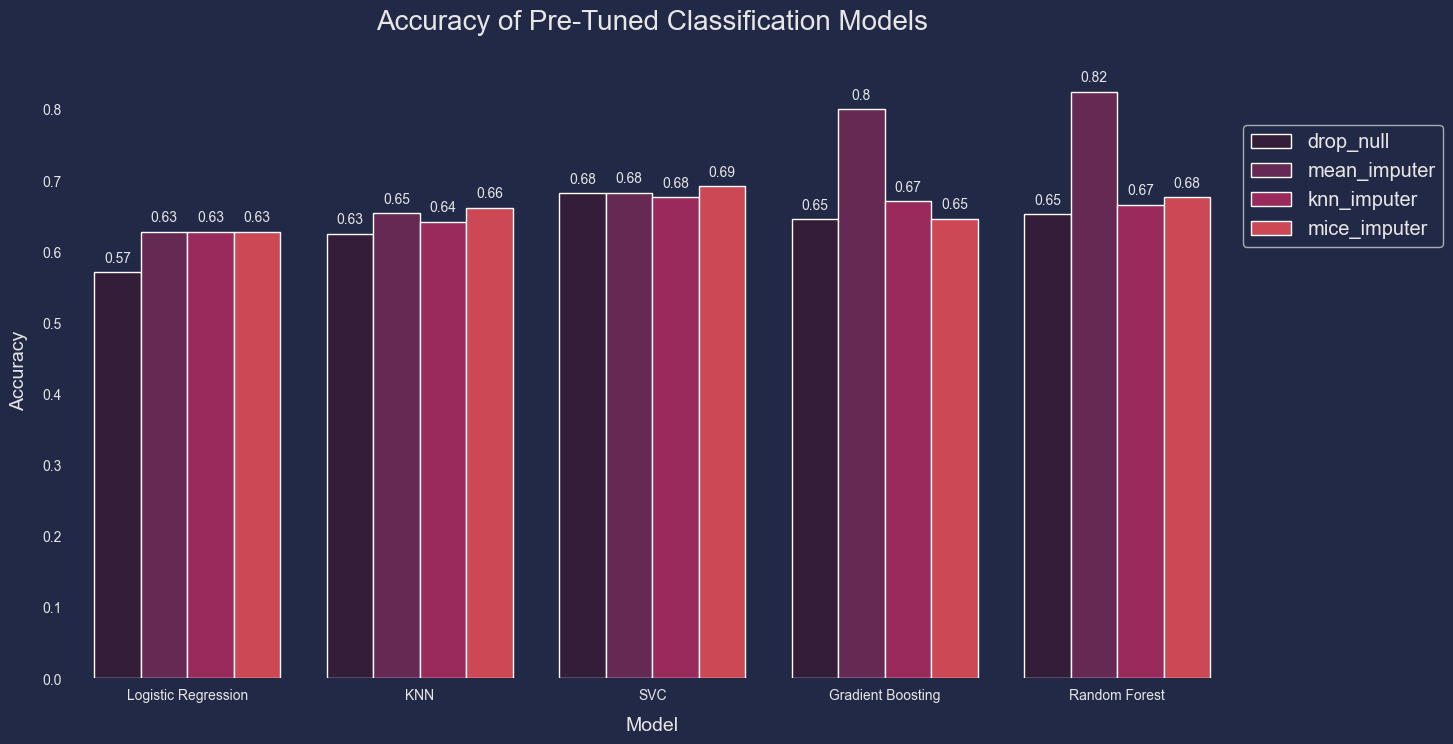

In [14]:
plt.figure(figsize=(15, 8))

sns.set_palette("rocket")

# Create the bar plot
ax_pre=sns.barplot(data=pretuned_df, x='model', y='score', hue='imputer')
sns.despine(left=True, bottom=True)
plt.legend(loc='center left', bbox_to_anchor=(1,0.8), fontsize='x-large')
plt.title("Accuracy of Pre-Tuned Classification Models", fontsize=20,y=1.04)
plt.xlabel('Model',fontsize=14, labelpad =10)
plt.ylabel('Accuracy',fontsize=14, labelpad =10)
# Annotate the bars with their values
for i, patch in enumerate(ax_pre.patches):
    # Get the x and y coordinates of the patch
    x = patch.get_x()
    y = patch.get_y()
    
    # Get the width and height of the patch
    width = patch.get_width()
    height = patch.get_height()
    
    # Calculate the center x coordinate and the top y coordinate of the patch
    center_x = x + width / 2
    top_y = y + height
    
    # Annotate the number above the patch with center alignment and a smaller offset and font size
    ax_pre.text(center_x, top_y + 0.01, round(height, 2),
            ha='center', va='bottom', fontsize=10)
# Display the plot
plt.show()

## Observations and study the parameters (features)
we define the function that return the features with thier score to determine which features play a vital role in water potability.

In [15]:
def calculate_importances(df:pd.DataFrame, featurelist:str, target:str, imputer):
    """Calculate the feature importances and make a data frame of features with thier score."""
    df_imputed = df.copy()
    if imputer =='mean_imputer':
        for column in df_imputed.columns:
             if df_imputed[column].isnull().any(): 
                 df_imputed = impute_mean_by_group(df_imputed, column, target)
    else:
      if imputer is not None:
        df_imputed[featurelist] = imputer.fit_transform(df[featurelist])
      else:
        df_imputed = df_imputed.dropna()

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        df_imputed[featurelist], df_imputed[target], test_size=0.2, random_state=42)
    
    
    robust_scaler = RobustScaler()
    
    X_train = robust_scaler.fit_transform(X_train)
    X_test = robust_scaler.transform(X_test)

    # Train the model on the imputed data
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Get the feature importances
    feature_importances = clf.feature_importances_

    # Get a list of feature names in the order they appear in your DataFrame
    features = df.drop([target], axis=1).columns

    # Create a DataFrame for the feature importances
    importance_df = pd.DataFrame({
        'feature': features,
        'score': feature_importances,
        'imputer': 'drop_null' if imputer is None else type(imputer).__name__
    })

    return importance_df


In [16]:
result = []

for imputer in imputers:
    importance_df = calculate_importances(df, features, 'Potability', imputer)
    
    result.append(importance_df)

score_df = pd.concat(result)

score_df = score_df.sort_values(by='score', ascending=False)

In [17]:
score_df['imputer']= score_df['imputer'].replace(imputer_dict)


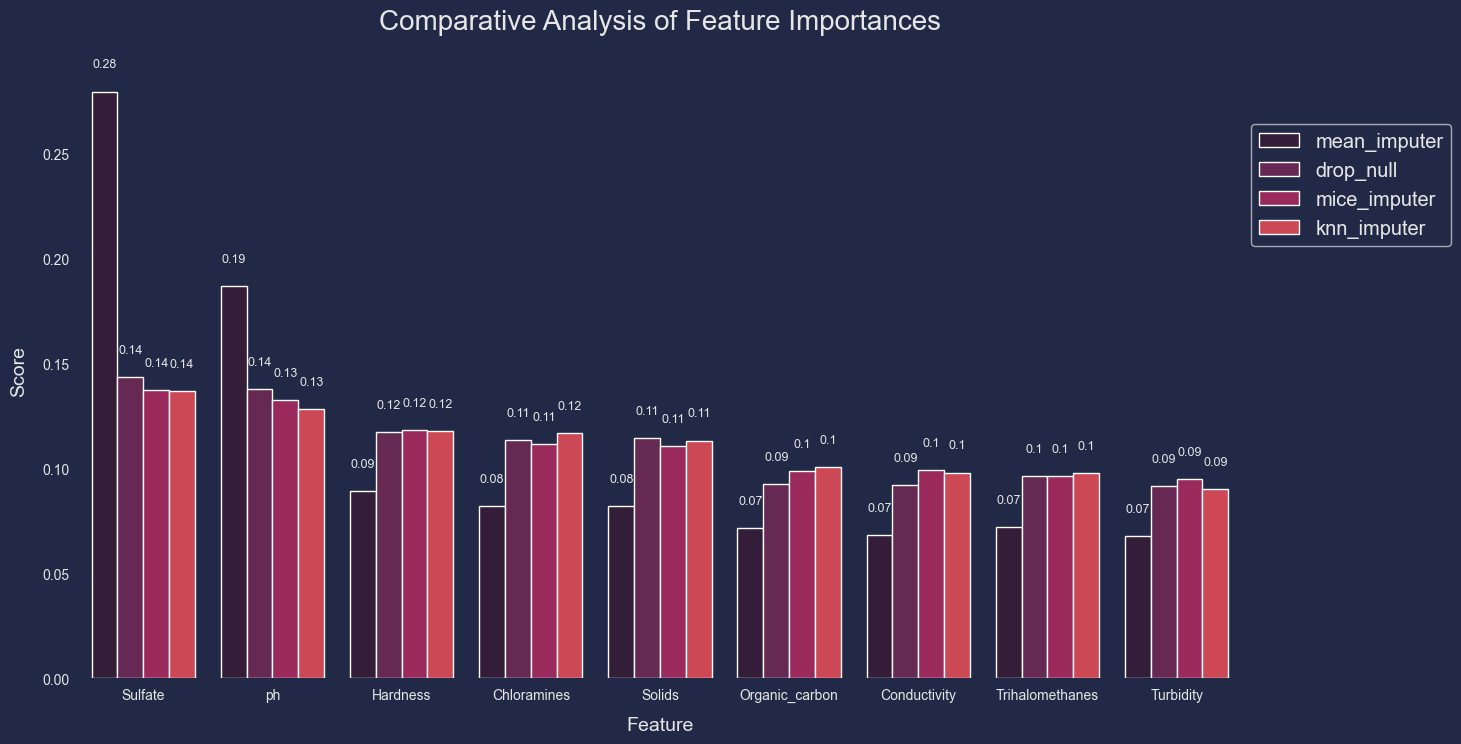

In [18]:
plt.figure(figsize=(15, 8))

sns.set_palette("rocket")

# Create the bar plot
ax=sns.barplot(data=score_df, x='feature', y='score', hue='imputer')
sns.despine(left=True, bottom=True)
plt.legend(loc='center left', bbox_to_anchor=(1,0.8), fontsize='x-large')
plt.title("Comparative Analysis of Feature Importances", fontsize=20,y=1.04)
plt.xlabel('Feature',fontsize=14, labelpad =10)
plt.ylabel('Score',fontsize=14, labelpad =10)
# Annotate the bars with their values
for i, patch in enumerate(ax.patches):
    # Get the x and y coordinates of the patch
    x = patch.get_x()
    y = patch.get_y()
    
    # Get the width and height of the patch
    width = patch.get_width()
    height = patch.get_height()
    
    # Calculate the center x coordinate and the top y coordinate of the patch
    center_x = x + width / 2
    top_y = y + height
    
    # Annotate the number above the patch with center alignment and a smaller offset and font size
    ax.text(center_x, top_y + 0.01, round(height, 2),
            ha='center', va='bottom', fontsize=9)
# Display the plot
plt.show()

## Pair Plot for Top Features
In this cell, we will plot a pair plot for the top features selected in the previous cell. This will help us to see the pairwise relationship and distribution of each feature.

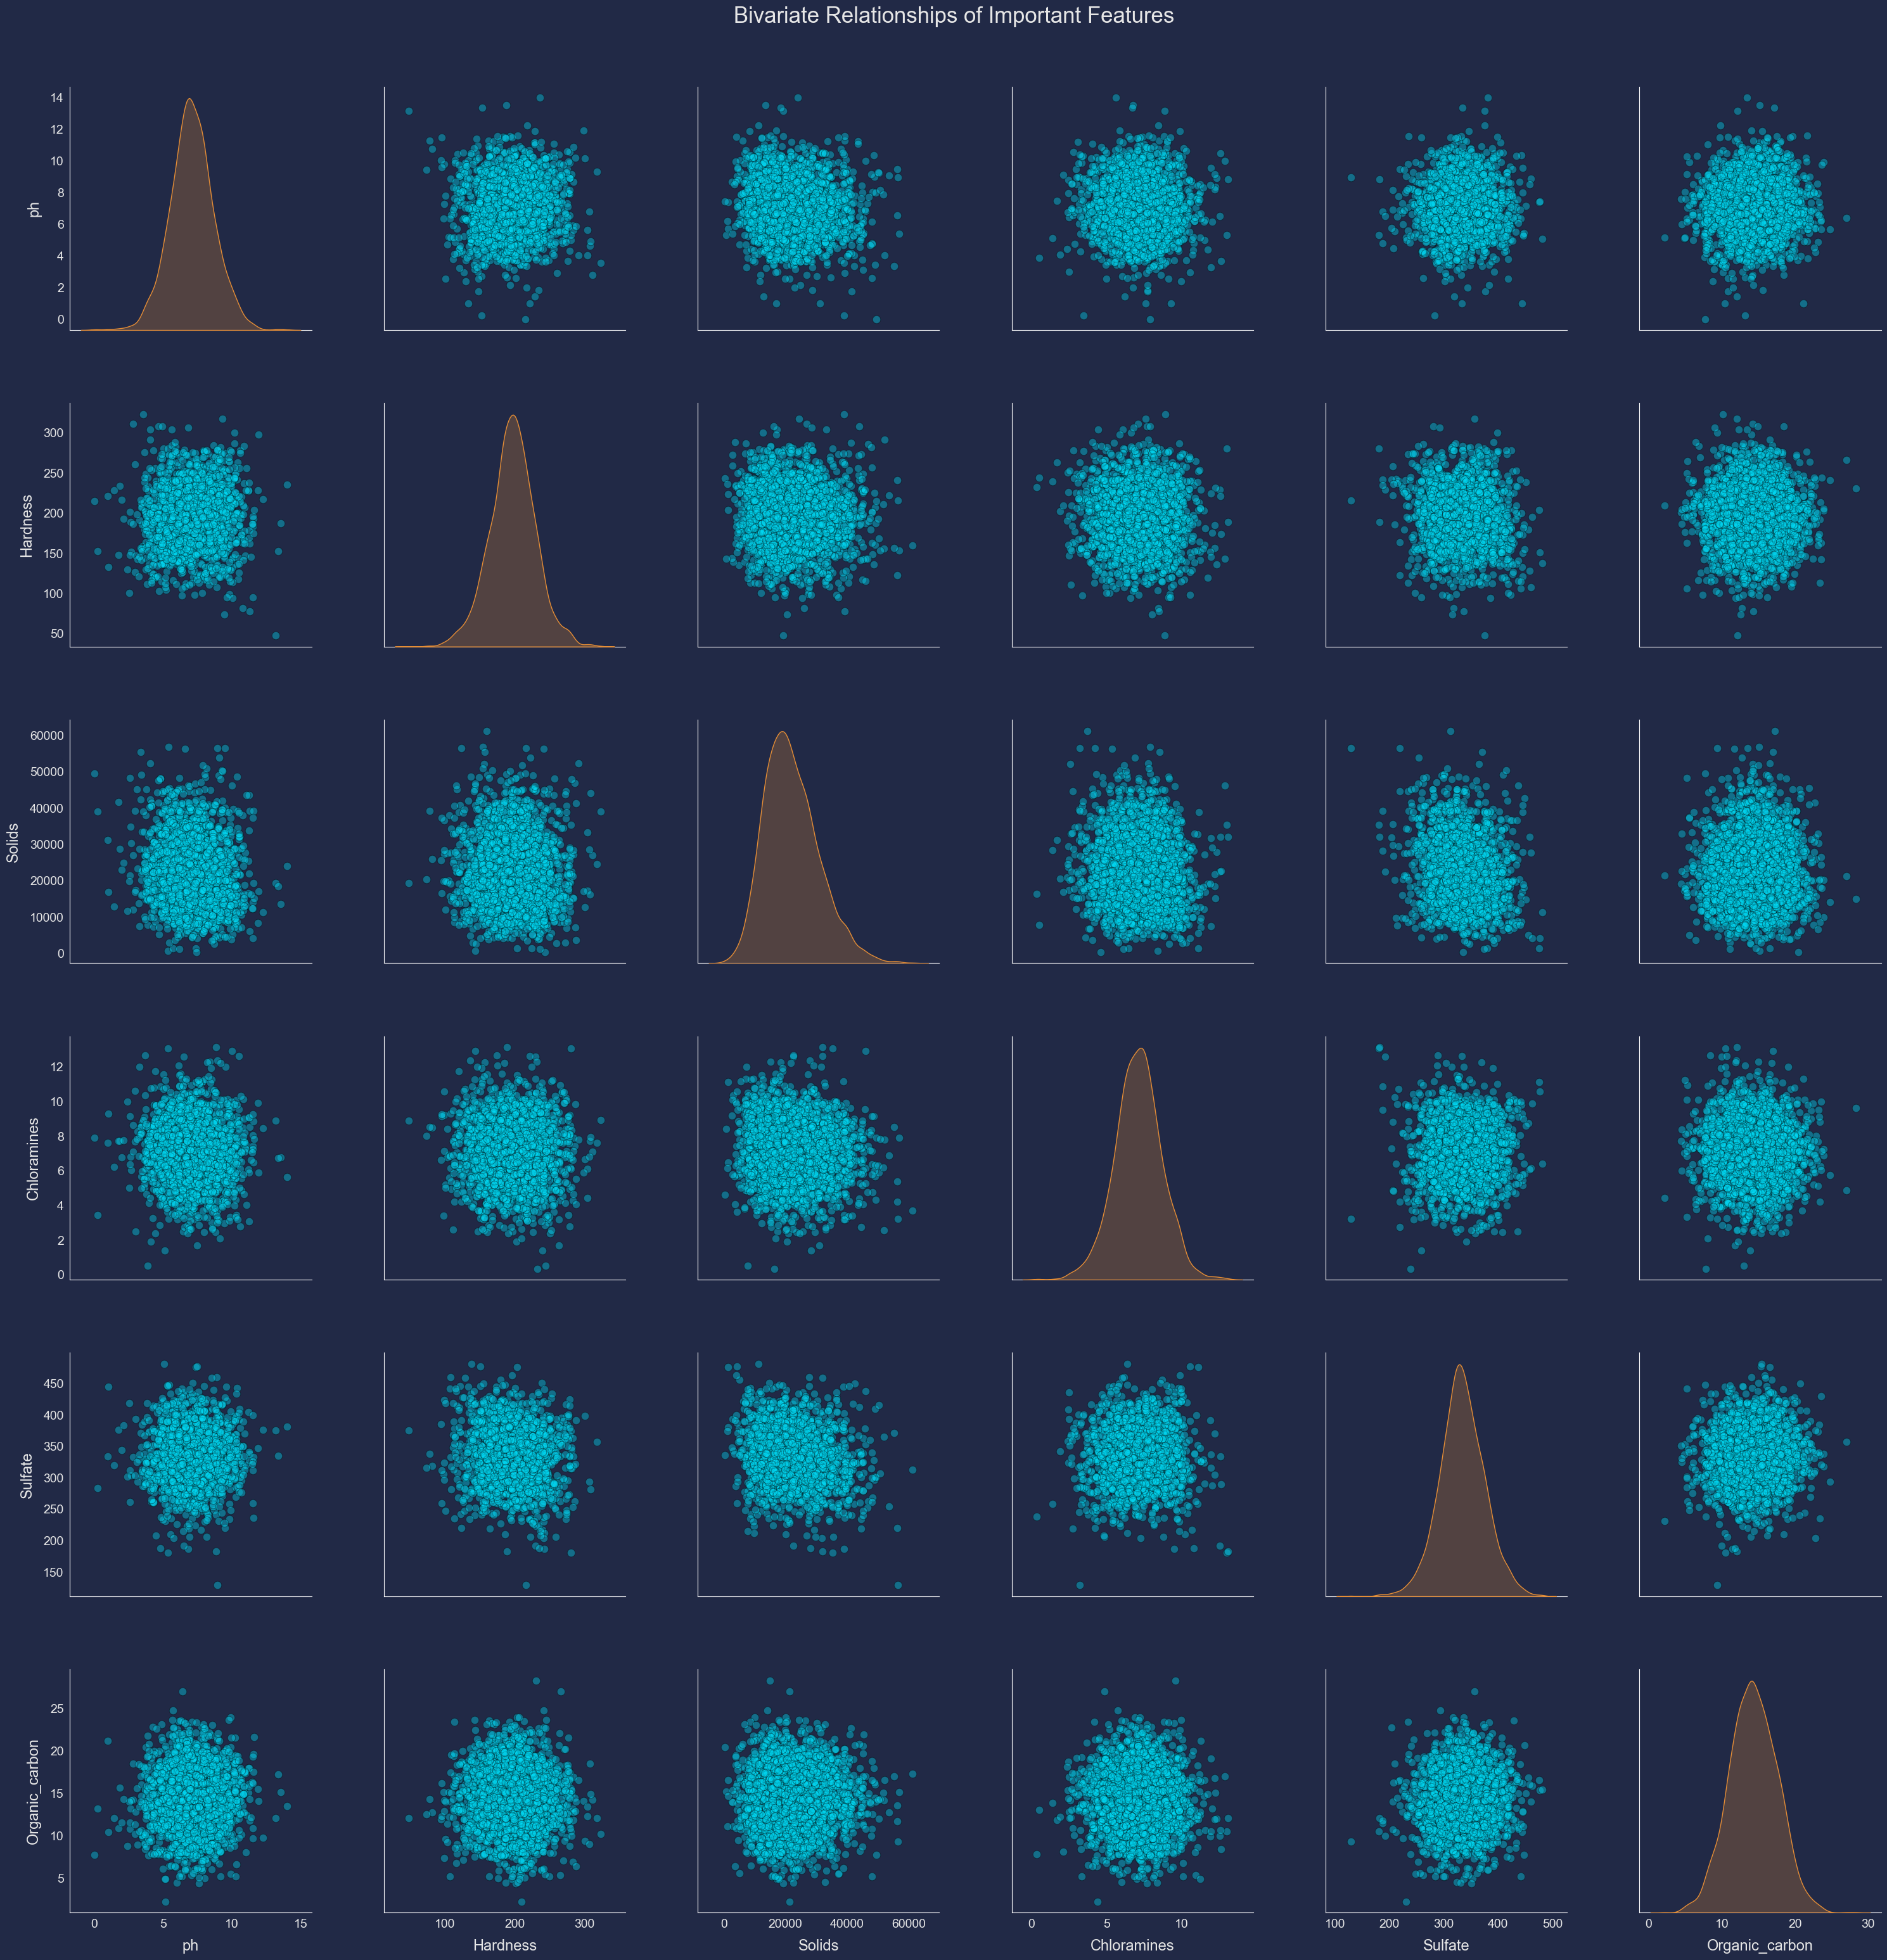

In [19]:

ax_pair=sns.pairplot(df[['ph','Hardness', 'Solids', 'Chloramines', 'Sulfate','Organic_carbon' ]],
         diag_kind='kde', plot_kws={'alpha': 0.4, 's': 80, 'edgecolor': 'k',"color": "#02d7f2"}, height=5, aspect=1, diag_kws={"color": "#E68E36"} )

plt.subplots_adjust(wspace=0.3, hspace=0.3)

for ax in ax_pair.axes.flatten():
    # Set x label size
    ax.set_xlabel(ax.get_xlabel(), fontsize=17, labelpad =10)
    
    # Set y label size
    ax.set_ylabel(ax.get_ylabel(), fontsize=17, labelpad =10)

    # Set x-tick and y-tick sizes
    ax.tick_params(axis='both', which='major', labelsize=14)

ax_pair.fig.suptitle("Bivariate Relationships of Important Features", fontsize=25, y=1.03)


sns.despine()

plt.show()

## Hyperparameter Tuning
In this cell, we will write a function to tune the hyperparameters of each model using grid search cross-validation. Performing the function on each models and print the best estimators with best score

In [6]:
def apply_model_enhance(df:pd.DataFrame, featurelist:str, target:str, imputer, model):
    """Apply given model with preprocess step to handle missing values then use it in tune hyperparams."""
    df_imputed = df.copy()
    if imputer =='mean_imputer':
        for column in df_imputed.columns:
             if df_imputed[column].isnull().any():  
                 df_imputed = impute_mean_by_group(df_imputed, column, target)

    X_train, X_test, y_train, y_test = train_test_split(
        df_imputed[featurelist], df_imputed[target], test_size=0.2, random_state=42)
    

    robust_scaler = RobustScaler()
    X_train = robust_scaler.fit_transform(X_train)
    X_test = robust_scaler.transform(X_test)
    model.fit(X_train, y_train)

  
X= df.columns.drop(['Conductivity','Turbidity', 'Potability'])
y= 'Potability'

In [21]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [22]:
param_grid_gbc = {
    'n_estimators': [100, 200, 300,400,500],
    'learning_rate': [0.001,0.01, 0.1, 1]
}

# Create a GradientBoostingClassifier object
gbc = GradientBoostingClassifier(random_state=42)
grid_gbc = GridSearchCV(gbc, param_grid_gbc,refit=True,n_jobs=-1,cv=5,scoring='accuracy')
apply_model_enhance(df,X,y,'mean_imputer',grid_gbc)
print(f"Best Estimator (GBC): {grid_gbc.best_params_} , Best Score (GBC): {grid_gbc.best_score_}")

Best Estimator (GBC): {'learning_rate': 0.1, 'n_estimators': 100} , Best Score (GBC): 0.7904580152671756


In [23]:
param_grid_rfc = {
    'n_estimators': [100, 200, 300,400],
    'max_depth' : [5,10,20,22,25]
}
rfc= RandomForestClassifier(random_state=42)
grid_rfc = GridSearchCV(rfc, param_grid_rfc,refit=True,n_jobs=-1,cv=5,scoring='accuracy')
apply_model_enhance(df,X,y,'mean_imputer',grid_rfc)
print(f"Best Estimator (CLF): {grid_rfc.best_params_} , Best Score (CLF): {grid_rfc.best_score_}")

Best Estimator (CLF): {'max_depth': 10, 'n_estimators': 400} , Best Score (CLF): 0.7988549618320611


In [24]:
param_grid_svc = {'C': [1, 10, 100],
            'gamma': [1,0.1,0.01,0.001]
              }
svc = SVC(random_state=42)

# Initialize GridSearchCV
grid_svc = GridSearchCV(svc, param_grid_svc, refit=True,n_jobs=-1,cv=5,scoring='accuracy')
apply_model_enhance(df,X,y,'mean_imputer',grid_svc)
print(f"Best Estimator (SVC): {grid_svc.best_params_} , Best Score (SVC): {grid_svc.best_score_}")


Best Estimator (SVC): {'C': 1, 'gamma': 1} , Best Score (SVC): 0.6759541984732825


In [25]:
# Logistic Regression Hyperparameter Tuning
param_grid_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
     'solver': ['newton-cg', 'liblinear', 'lbfgs']}
logReg = LogisticRegression(random_state=42)

grid_log = GridSearchCV(logReg, param_grid_log, refit=True,n_jobs=-1,cv=5,scoring='accuracy')
apply_model_enhance(df,X,y,'mean_imputer',grid_log)

print(f"Best Estimator (Logistic): {grid_log.best_params_} , Best Score (Logistic): {grid_log.best_score_}")

Best Estimator (Logistic): {'C': 0.01, 'solver': 'liblinear'} , Best Score (Logistic): 0.6061068702290078


In [26]:
# KNN Hyperparameter Tuning
param_grid_knn = {'n_neighbors': [2, 3, 4, 9, 10],
         'weights' : ['uniform','distance']}

KNN = KNeighborsClassifier(n_neighbors=4)

grid_knn = GridSearchCV(KNN, param_grid_knn, refit=True,n_jobs=-1,cv=5,scoring='accuracy')
apply_model_enhance(df,X,'Potability','mean_imputer',grid_knn)
print(f"Best Estimator (KNN): {grid_knn.best_params_} , Best Score (KNN): {grid_knn.best_score_}")

Best Estimator (KNN): {'n_neighbors': 10, 'weights': 'distance'} , Best Score (KNN): 0.665267175572519


## Plot par plot for models after tuning

In [27]:
models_posttuned = [
    LogisticRegression(random_state=42, C= 0.001,solver= 'liblinear'),
    KNeighborsClassifier(n_neighbors=10, weights='uniform'),
    SVC(random_state=42, C= 10, kernel= 'rbf',gamma= 0.1),
    GradientBoostingClassifier(random_state=42, learning_rate= 0.1, n_estimators= 100),
    RandomForestClassifier(random_state=42, max_depth= 22, n_estimators= 400)
]
posttuned_df = []
for model in models_posttuned:
    for imputer in imputers:  
        cv_score = apply_model(df, X, 'Potability', imputer, model)
        imputer_name = 'drop_null' if imputer is None else type(imputer).__name__
        posttuned_df.append({'model': type(model).__name__, 'imputer': imputer_name, 'cv_score': cv_score})


posttuned_df = pd.DataFrame(posttuned_df)
    

In [28]:
posttuned_df['imputer']= posttuned_df['imputer'].replace(imputer_dict)
posttuned_df['model']= posttuned_df['model'].replace(model_dict)

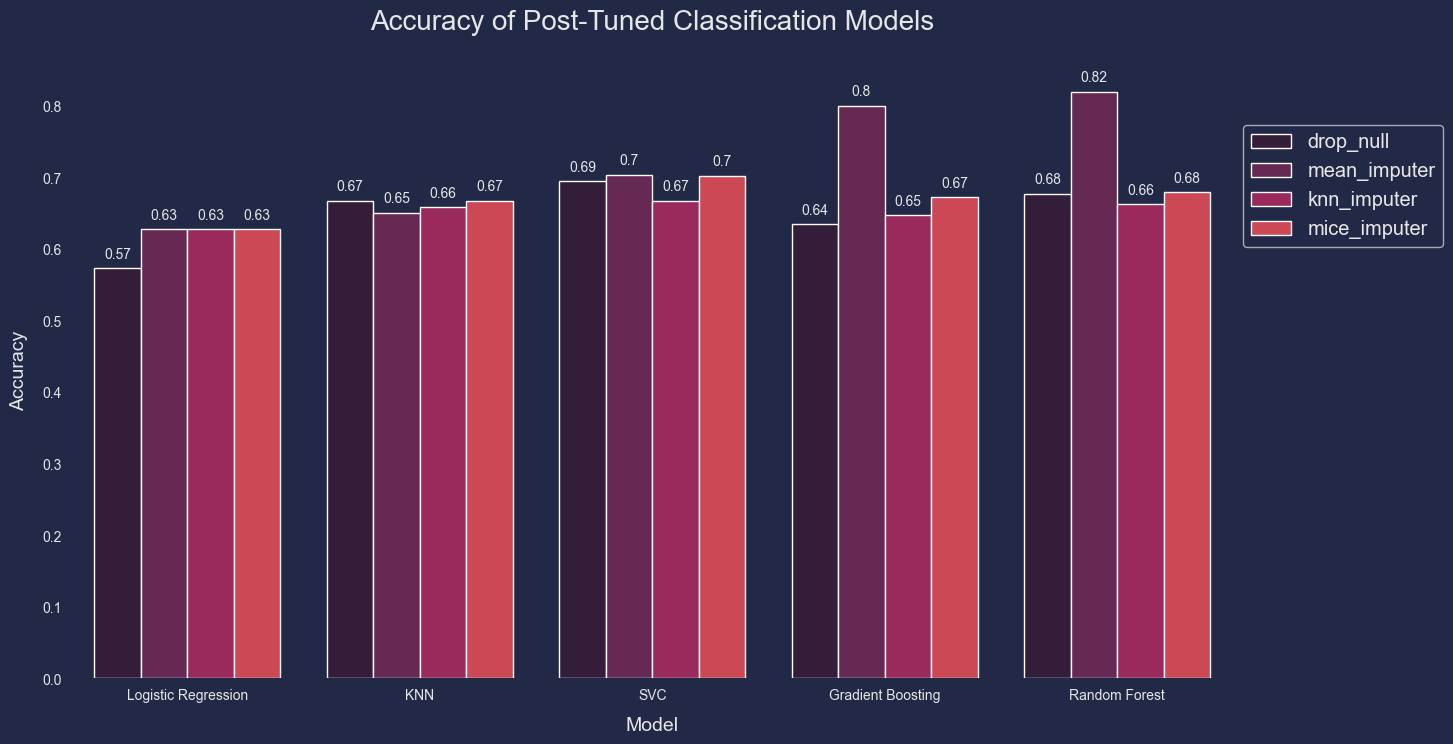

In [29]:
plt.figure(figsize=(15, 8))

sns.set_palette("rocket")

# Create the bar plot
ax_po=sns.barplot(data=posttuned_df, x='model', y='cv_score', hue='imputer')
sns.despine(left=True, bottom=True)
plt.legend(loc='center left', bbox_to_anchor=(1,0.8), fontsize='x-large')
plt.title("Accuracy of Post-Tuned Classification Models", fontsize=20,y=1.04)
plt.xlabel('Model',fontsize=14, labelpad =10)
plt.ylabel('Accuracy',fontsize=14, labelpad =10)
# Annotate the bars with their values
for i, patch in enumerate(ax_po.patches):
    # Get the x and y coordinates of the patch
    x = patch.get_x()
    y = patch.get_y()
    
    # Get the width and height of the patch
    width = patch.get_width()
    height = patch.get_height()
    
    # Calculate the center x coordinate and the top y coordinate of the patch
    center_x = x + width / 2
    top_y = y + height
    
    # Annotate the number above the patch with center alignment and a smaller offset and font size
    ax_po.text(center_x, top_y + 0.01, round(height, 2),
            ha='center', va='bottom', fontsize=10)
# Display the plot
plt.show()

## Model Evaluation
- Confusion Matrix
- Classification Report

In [13]:
def report_confusion(df:pd.DataFrame,featurelist:str,target:str,imputer,model,title):
    df_imputed = df.copy()
    if imputer =='mean_imputer':
        for column in df_imputed.columns:
             if df_imputed[column].isnull().any():  
                 df_imputed = impute_mean_by_group(df_imputed, column, target)
    else:
      if imputer is not None:
        df_imputed[featurelist] = imputer.fit_transform(df[featurelist])
      else:
        df_imputed = df_imputed.dropna()

    X_train, X_test, y_train, y_test = train_test_split(
        df_imputed[featurelist], df_imputed[target], test_size=0.2, random_state=42)

    robust_scaler = RobustScaler()
       
    X_train = robust_scaler.fit_transform(X_train)
    X_test = robust_scaler.transform(X_test)
    model.fit(X_train, y_train)
    predictions= model.predict(X_test)
    with warnings.catch_warnings(record=True) as w:
        warnings.simplefilter("always")  # Cause all warnings to always be triggered

        try:
            print(classification_report(y_test, predictions))  # Generates a warning
        except UndefinedMetricWarning:
            print(classification_report(y_test, predictions, zero_division=0))
    cm=confusion_matrix(y_test, predictions)        

    total_predictions = np.sum(cm)

    correct_predictions = np.trace(cm)

    incorrect_predictions = total_predictions - correct_predictions

    error_percentage = (incorrect_predictions / total_predictions) * 100
    display(f"The error percentage is {error_percentage:.2f}%")
    display(cm)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm/np.sum(cm), annot=True,fmt='0.2%')
    plt.title(title, fontsize=15,y=1.05)
    plt.show()



              precision    recall  f1-score   support

           0       0.71      0.89      0.79       412
           1       0.68      0.39      0.49       244

    accuracy                           0.70       656
   macro avg       0.70      0.64      0.64       656
weighted avg       0.70      0.70      0.68       656



'The error percentage is 29.57%'

array([[368,  44],
       [150,  94]], dtype=int64)

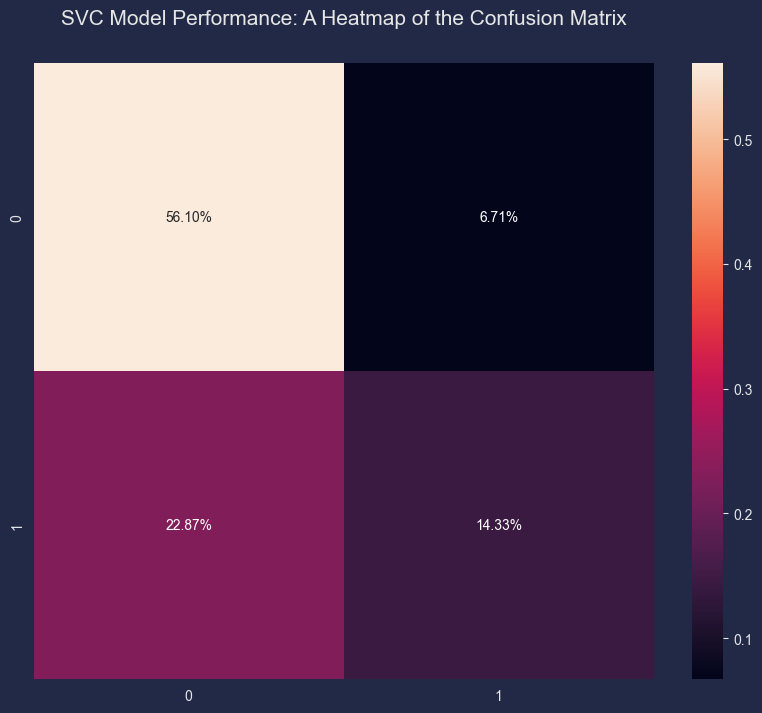

In [31]:
svc_model=SVC(random_state=42, C= 10, kernel= 'rbf',gamma= 0.1)
report_confusion(df,X,'Potability','mean_imputer',svc_model,'SVC Model Performance: A Heatmap of the Confusion Matrix')


              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



'The error percentage is 37.20%'

array([[412,   0],
       [244,   0]], dtype=int64)

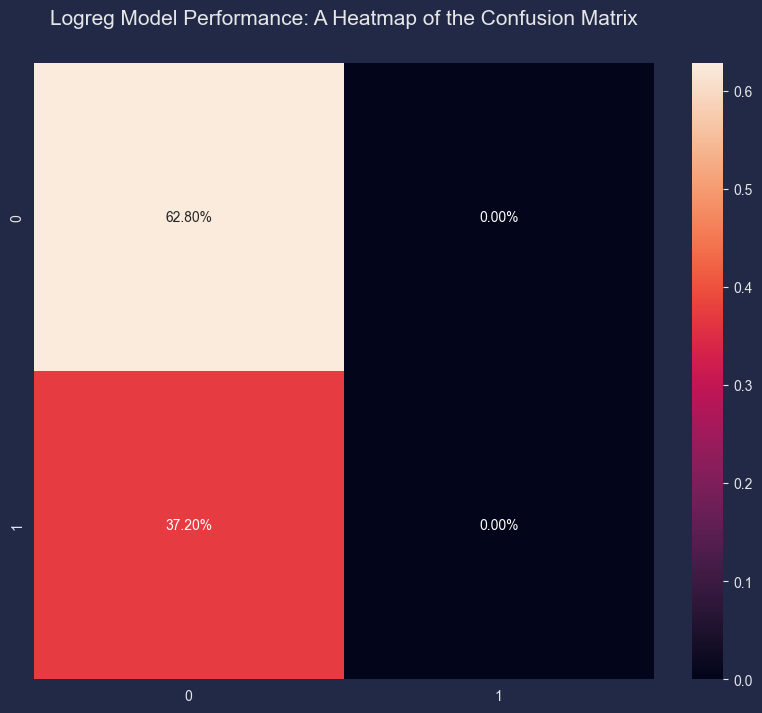

In [32]:
logreg_model= LogisticRegression(random_state=42, C= 0.001,solver= 'liblinear')

report_confusion(df,X,'Potability','mean_imputer',logreg_model,'Logreg Model Performance: A Heatmap of the Confusion Matrix')


              precision    recall  f1-score   support

           0       0.67      0.87      0.76       412
           1       0.56      0.28      0.37       244

    accuracy                           0.65       656
   macro avg       0.62      0.58      0.57       656
weighted avg       0.63      0.65      0.61       656



'The error percentage is 34.91%'

array([[359,  53],
       [176,  68]], dtype=int64)

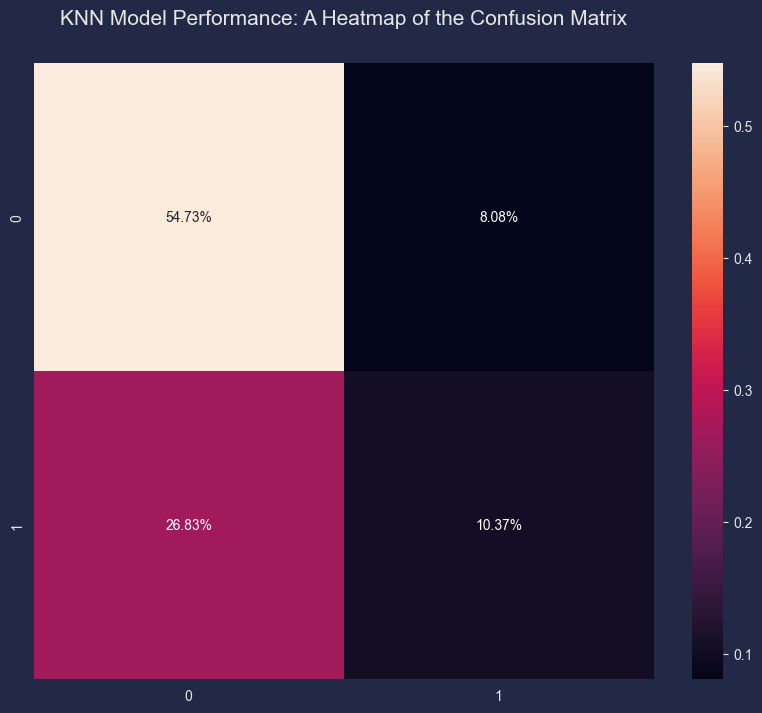

In [33]:
knn_model=KNeighborsClassifier(n_neighbors=10, weights='uniform')
report_confusion(df,X,'Potability','mean_imputer',knn_model,'KNN Model Performance: A Heatmap of the Confusion Matrix')


              precision    recall  f1-score   support

           0       0.78      0.94      0.86       412
           1       0.85      0.57      0.68       244

    accuracy                           0.80       656
   macro avg       0.82      0.75      0.77       656
weighted avg       0.81      0.80      0.79       656



'The error percentage is 19.97%'

array([[387,  25],
       [106, 138]], dtype=int64)

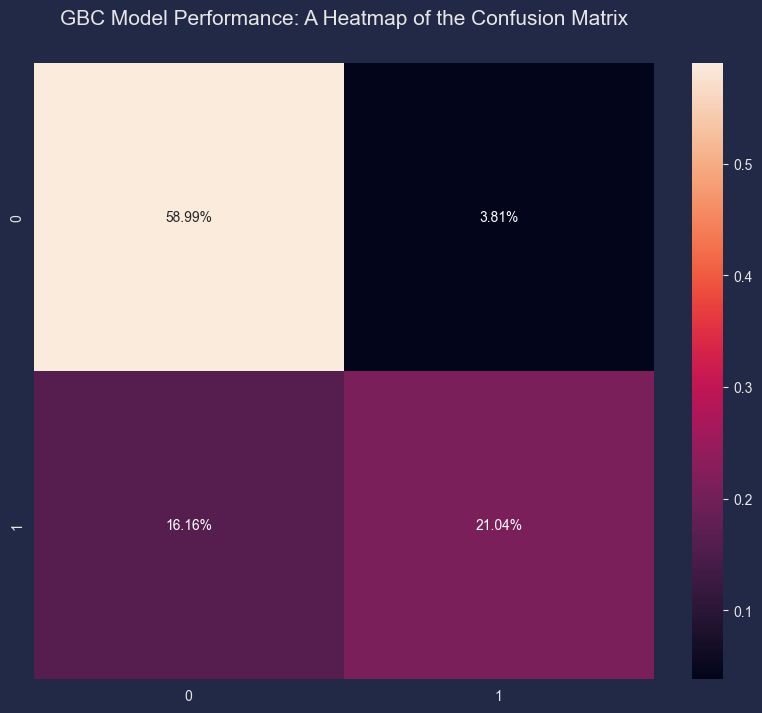

In [34]:
gbc_model=GradientBoostingClassifier(random_state=42, learning_rate= 0.1, n_estimators= 100)
report_confusion(df,X,'Potability','mean_imputer',gbc_model,'GBC Model Performance: A Heatmap of the Confusion Matrix')


              precision    recall  f1-score   support

           0       0.81      0.93      0.87       412
           1       0.85      0.63      0.72       244

    accuracy                           0.82       656
   macro avg       0.83      0.78      0.79       656
weighted avg       0.82      0.82      0.81       656



'The error percentage is 17.99%'

array([[384,  28],
       [ 90, 154]], dtype=int64)

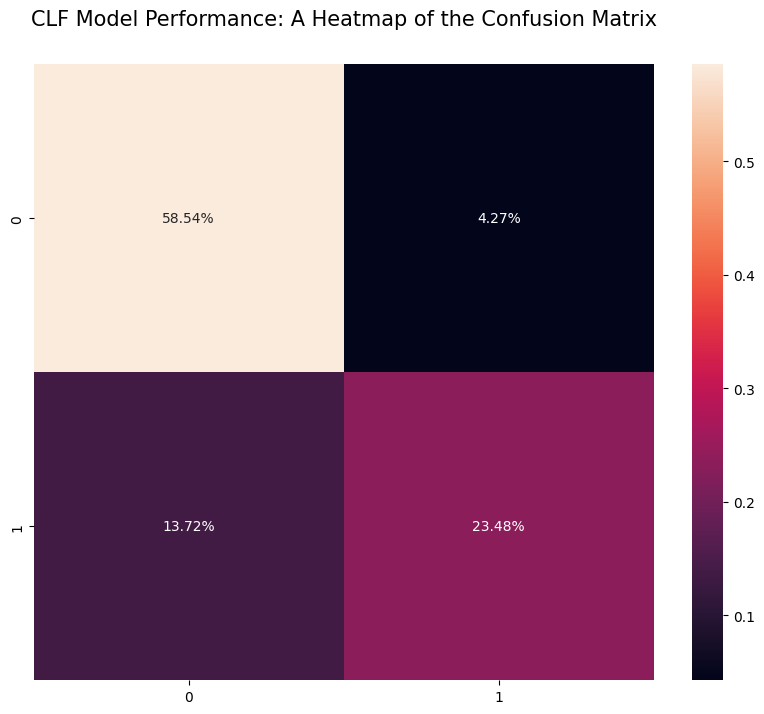

In [14]:
clf_model= RandomForestClassifier(random_state=42, max_depth= 22, n_estimators= 400)

report_confusion(df,X,'Potability','mean_imputer',clf_model,'CLF Model Performance: A Heatmap of the Confusion Matrix')


In [4]:
def split(df:pd.DataFrame,featurelist:str,target:str,imputer:str):
    df_imputed = df.copy()
    if imputer =='mean_imputer':
        for column in df_imputed.columns:
             if df_imputed[column].isnull().any():  # Only impute columns with missing values
                 df_imputed = impute_mean_by_group(df_imputed, column, 'Potability')
    X_train, X_test, y_train, y_test = train_test_split(
        df_imputed[featurelist], df_imputed[target], test_size=0.2, random_state=42)

    robust_scaler = RobustScaler()

    X_train = robust_scaler.fit_transform(X_train)
    X_test = robust_scaler.transform(X_test)
    return (X_train, X_test, y_train, y_test)

In [10]:
X_train, X_test, y_train, y_test=split(df,X,'Potability','mean_imputer')

In [15]:
import joblib 
joblib_file = "water_potability_model1"
joblib.dump(clf_model,joblib_file)

loaded_model = joblib.load(open(joblib_file, 'rb'))

pred_y= loaded_model.predict(X_test)
result= np.round(accuracy_score(y_test,pred_y),2)
print(result)

0.82


In [16]:
import streamlit as st
import requests
from streamlit_lottie import st_lottie
from PIL import Image